## Data Visualization - R

### Background

This notebook intends to provide example of basic to advanced data visualization techniques using R. The intention is not to go deep in `ggplot` using a handful of plots and show all the options, rather showcase different graph types and how to generate them.

It is also noteworthy that a very critical graph, _Bullet Graph_ has been kept out in this notebook for the time being. I am working in creating a function for bullet graph as a separate project. Once completed, it could be added as a graph type in this notebook.

In [7]:
# Import required packages
library("magrittr")
library("repr")

# Import data to be used for visualization
fileData = paste(getwd(), "/Data/obama-approval-ratings.xls", sep = "")
obama = xlsx::read.xlsx(fileData, sheetIndex = 1, stringsAsFactors = FALSE)

# Examine data
head(obama)

Issue,Approve,Disapprove,None
Race Relations,52,38,10
Education,49,40,11
Terrorism,48,45,7
Energy Policy,47,42,11
Foreign Affairs,44,48,8
Environment,43,51,6


### Bar Chart

We use bar chart or bar graph to represent categorical data as the rectangular bars with heights (vertical bar) or lengths (horizontal bar) proportional to the values that they represent. As the definition suggests, bar chart could be either vertical or horizontal.

Here, the categorical variable is issue and can be plotted on *x-axis*. Let's pick Approval Ratings as the measure and plot it on the *y-axis*.

<img src="Images/bar.png">

_Image ref:_ http://ksrowell.com

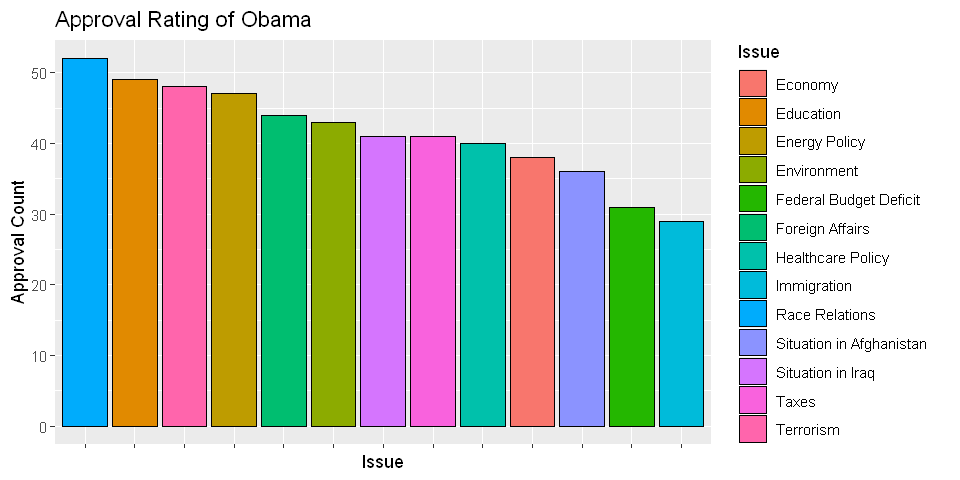

In [8]:
# Set output plot size
options(repr.plot.width=8, repr.plot.height=4)

# Create bar plot
obama %>%
    dplyr::select(Issue, Approve) %>%
    dplyr::arrange(-Approve) %>%
    dplyr::mutate(SortOrder = factor(Issue, Issue)) %>% 
    ggplot2::ggplot(ggplot2::aes(x=SortOrder, y=Approve, fill=Issue)) +
        ggplot2::geom_bar(stat='identity', color='black') + 
        ggplot2::xlab('Issue') + ggplot2::ylab('Approval Count') +
        ggplot2::theme(axis.text.x=ggplot2::element_blank()) +
        ggplot2::ggtitle('Approval Rating of Obama') 

### Stacked Bar Chart

A stacked bar chart is similar to bar chart, but it adds more detail to the visual. It breaks down and compare parts of a whole (category). Each bar in the chart represents a whole, and segments in the bar represent different parts or categories of that whole. Similar to bar chart, stacked bar chart can also be vertical or horizontal.

Let us plot each issue with their respective Approval, Disapproval and Neutral counts. This will generate a 100% stacked bar chart for each issue, so that the reactions are rightfully captured. 100% stacked bar is just another variant of regular stacked bar where all the measures are normalized as percentage instead of actual value.

<img src="Images/stacked.jpg">

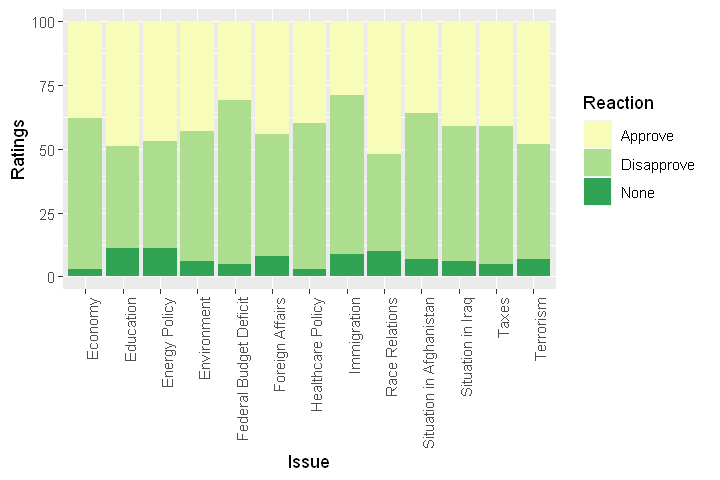

In [24]:
# Set output plot size
options(repr.plot.width=6, repr.plot.height=4)

# We need to reshape the data to long format for this purpose
obama_long = obama %>%
    tidyr::gather('Reaction','Ratings', Approve, Disapprove, None)

# Plot stacked
ggplot2::ggplot(data = obama_long, ggplot2::aes(x = Issue, y = Ratings, fill = Reaction)) + 
    ggplot2:: geom_bar(stat='identity') + 
    ggplot2::theme(axis.text.x = ggplot2::element_text(angle = 90, hjust = 1)) + 
    ggplot2::scale_fill_brewer(palette = 15)

### Pie Chart

A Pie-chart is a useful way of representing small numbers of variables. Particular aspects can be emphasised by exploding or highlighting segments. The pie chart is ideally suited to small numbers of variables, so the number of fill patterns or colours available will rarely be an issue, although the appropriate choice of pattern or colour will be important.

Having said that, processing accurate information based on arc angle and vollume of slice is not easy for human brain. A pie chart could be easily replaced by a stacked bar chart.

Let us consider the numbners of different reactions to the immigration issue during Obama era to demonstrate pie chart.?

<img src="Images/pie.gif">

_image source:_ http://www.agocg.ac.uk/

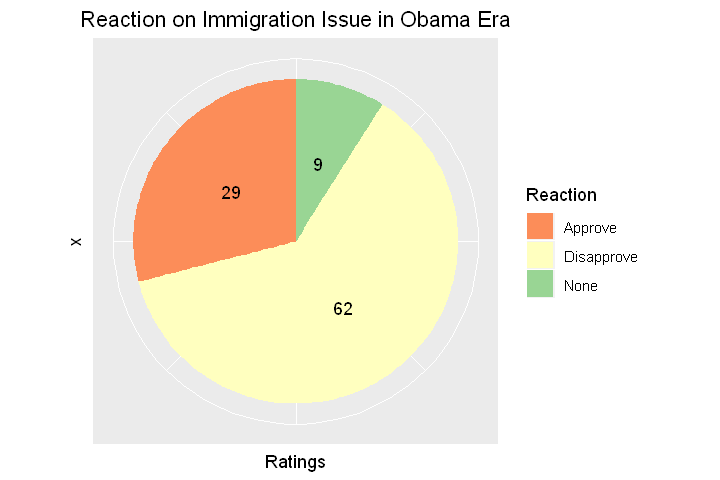

In [33]:
# For this purpose, I would need the long data set. Because we need the stacked chart before creating pie chart from it
# Since pie chart is not easy to digest, I would NOT use the same color family for the different sections
obama_long %>%
    dplyr::filter(Issue=='Immigration') %>%
    ggplot2::ggplot(ggplot2::aes(x="", y=Ratings, fill=Reaction))+
        ggplot2::geom_bar(width = 1, stat = 'identity') +
        ggplot2::coord_polar('y', start=0) + 
        ggplot2::geom_text(ggplot2::aes(label = Ratings), position = ggplot2::position_stack(vjust = 0.5)) +
        ggplot2::ggtitle(label = 'Reaction on Immigration Issue in Obama Era') +
        ggplot2::scale_fill_brewer(palette='Spectral') + 
        ggplot2::theme(axis.line = ggplot2::element_blank(),
          axis.text = ggplot2::element_blank(),
          axis.ticks = ggplot2::element_blank(),
          plot.title = ggplot2::element_text(hjust = 0.5))

### Donut Chart

A donut chart is essentially a pie chart with the center cut out. Donit chart is intended to handle the drawbacks of comparing areas of the slices as in pie chart. Additionally, as in the example, the blank area at the center of the donut chart could be used to show other information.

But still, donut charts do not add anything supirior comapred to stacked bar or bar.

Different reactions on education issues during Obama era is plotted in a rin/donut.

<img src="Images/donut.jpg">

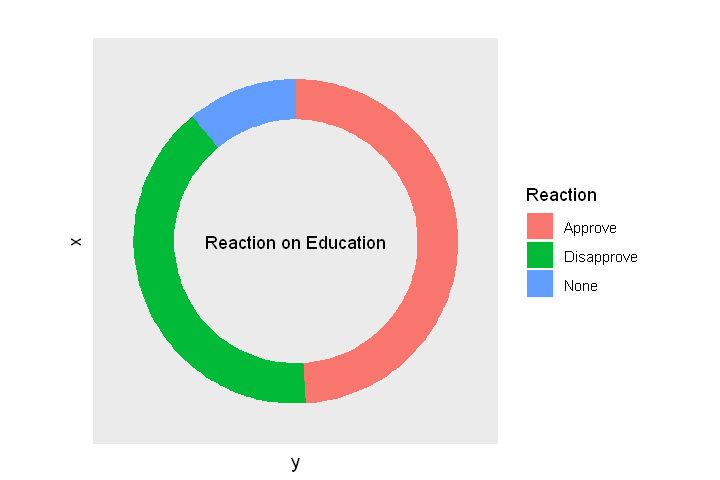

In [32]:
obama_long %>%
    dplyr::filter(Issue=='Education') %>%
    dplyr::mutate(ymax=cumsum(Ratings),
                  ymin=c(0,ymax[1:length(ymax)-1])) %>%
    ggplot2::ggplot(ggplot2::aes(fill=Reaction, ymax=ymax, ymin=ymin, xmax=4, xmin=3)) +
         ggplot2::geom_rect() +
         ggplot2::coord_polar(theta='y') +
         ggplot2::xlim(c(0, 4)) +
         ggplot2::theme(panel.grid=ggplot2::element_blank()) +
         ggplot2::theme(axis.text=ggplot2::element_blank()) +
         ggplot2::theme(axis.ticks=ggplot2::element_blank()) +
         ggplot2::annotate('text', x = 0, y = 0, label = 'Reaction on Education') +
         ggplot2::labs(title='')

### Line Graph

Line graphs are used to track changes over short and long periods of time. When smaller changes exist, line graphs are better to use than bar graphs. Line graphs can also be used to compare changes over the same period of time for more than one group.

For line graph demonstration, let's plot the profit by order year and segment from the famous _Sample Superstores_ dataset. This needs some additional data preparation as below.

<img src="Images/line.gif">

_image source:_ http://www.owlnet.rice.edu

In [36]:
# Import data to be used for visualization
fileData = paste(getwd(), "/Data/Sample - Superstore.xlsx", sep = "")
superstore = xlsx::read.xlsx(fileData, sheetIndex = 1, stringsAsFactors = FALSE)

# Data preparation before plotting in a line graph
superstorePrep = superstore %>% 
                  dplyr::mutate(OrderYear = as.numeric(format(as.Date(Order.Date), '%Y'))) %>% 
                  dplyr::select(OrderYear, Segment, Profit) %>% 
                  dplyr::group_by(OrderYear, Segment) %>% 
                  dplyr::summarise(TotalProfit = sum(Profit))

# Examine data
head(superstorePrep)

OrderYear,Segment,TotalProfit
<dbl>,<chr>,<dbl>
2014,Consumer,24319.85
2014,Corporate,13513.28
2014,Home Office,11710.85
2015,Consumer,28460.17
2015,Corporate,20688.32
2015,Home Office,12470.11


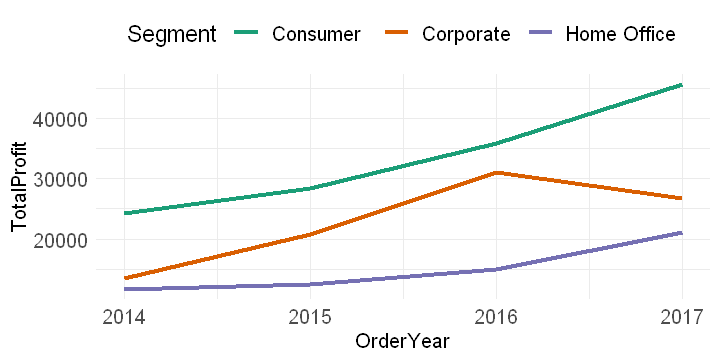

In [39]:
# Set output plot size
options(repr.plot.width=6, repr.plot.height=3)

# Create line plot
ggplot2::ggplot(data=superstorePrep, ggplot2::aes(x=OrderYear, y=TotalProfit, group=Segment)) +
    ggplot2::geom_line(linetype='solid', size=1.2, ggplot2::aes(color=Segment)) +
    ggplot2::scale_color_brewer(palette='Dark2') +
    ggplot2::theme_minimal() +
    ggplot2::theme(legend.position='top', 
                   legend.title=ggplot2::element_text(size=14), 
                   legend.text=ggplot2::element_text(size=12),
                   axis.text=ggplot2::element_text(size=12),
                   axis.title=ggplot2::element_text(size=12)
                  )

### Step Graph

A step graph is a special type of line graph that is made up of lines in several horizontal intervals or 'steps'. The end of the previous horizontal step lies on the same vertical line for the start of the next step, i.e. each new step begins directly above where the previous step finished.

The line graph in the prior segment is displayed as a step graph as below.

<img src="Images/step.png">

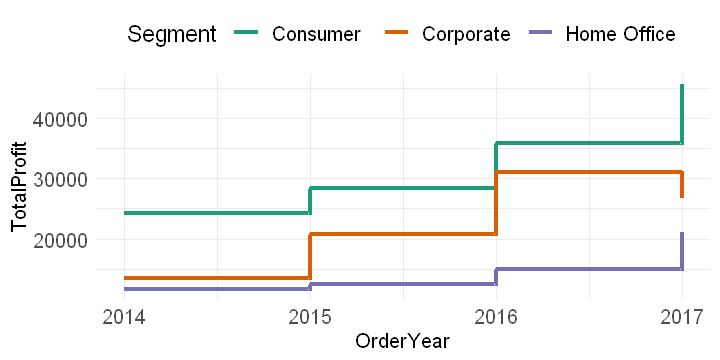

In [46]:
ggplot2::ggplot(data=superstorePrep, ggplot2::aes(x=OrderYear, y=TotalProfit, group=Segment)) +
    ggplot2::geom_step(linetype='solid', size=1.2, ggplot2::aes(color=Segment)) +
    ggplot2::scale_color_brewer(palette='Dark2') +
    ggplot2::theme_minimal() +
    ggplot2::theme(legend.position='top', 
                   legend.title=ggplot2::element_text(size=14), 
                   legend.text=ggplot2::element_text(size=12),
                   axis.text=ggplot2::element_text(size=12),
                   axis.title=ggplot2::element_text(size=12)
                  )

### Area Chart

An area chart or area graph displays graphically quantitative data. It is based on the line chart. The area between axis and line are commonly emphasized with colors, textures and hatchings. Commonly one compares two or more quantities with an area chart.

_Source:_ https://en.wikipedia.org/wiki/Area_chart

<img src="Images/area.png">

In [13]:
# Load data for area chart
file_unemployement = paste(getwd(),'/Data/unemployement-rate-1948-2010.csv',sep='')

raw_unemployement = read.csv2(file_unemployement, sep=',', stringsAsFactors = FALSE) %>% 
    dplyr::mutate(Value = as.numeric(Value)) %>% 
    as.data.frame()

# Format data for area chart
avg_unemployement = raw_unemployement %>%
    dplyr::group_by(Year) %>%
    dplyr::summarize('Average Value' = mean(Value))

head(avg_unemployement)

Year,Average Value
1948,3.750000
1949,6.050000
1950,5.208333
1951,3.283333
1952,3.025000
1953,2.925000


For demonstration, let's plot the average employment count by year.

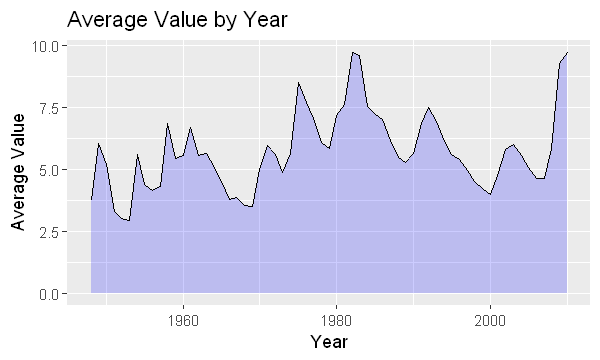

In [16]:
# Set output plot size
options(repr.plot.width=5, repr.plot.height=3)

# Create area chart
ggplot2::ggplot(avg_unemployement, ggplot2::aes(x=Year , y=`Average Value`)) +
ggplot2::geom_area( fill='blue', alpha=.2) +
ggplot2::geom_line() +
ggplot2::ggtitle('Average Value by Year')

### Stacked Area Chart

A stacked area chart is the extension of a basic area chart to display the evolution of the value of several groups on the same graphic. The values of each group are displayed on top of each other. It allows to check on the.

_Source:_ https://python-graph-gallery.com/250-basic-stacked-area-chart/

<img src="Images/stacked area.png">

In [17]:
# Load data for stacked area chart
file_expenditures = paste(getwd(),'/Data/expenditures.txt', sep='')
raw_expenditures = read.table(file_expenditures, header = TRUE, sep = "\t", dec = ".", fill = TRUE)

head(raw_expenditures)

year,category,expenditure,sex
2008,Food,6443,1
2008,Alcoholic Beverages,444,1
2008,Housing,17109,1
2008,Apparel,1801,1
2008,Transportation,8604,1
2008,Healthcare,2976,1


Let's take a look at what is the trend of the expenditure of each category over the years, from the expenditure dataset.

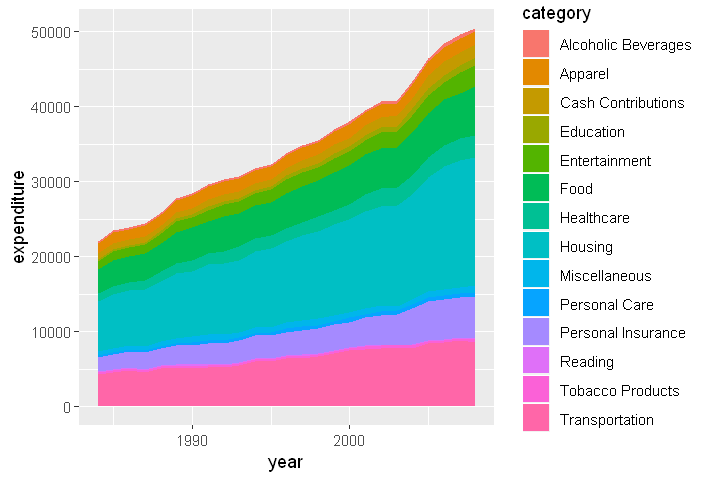

In [19]:
# Set output plot size
options(repr.plot.width=6, repr.plot.height=4)

ggplot2::ggplot(raw_expenditures, ggplot2::aes(x=year, y=expenditure, fill=category)) + 
  ggplot2::geom_area()

### Scatter Plot

A scatter plot, also known as a scatter graph or a scatter chart, is a two-dimensional data visualization that uses dots to represent the values obtained for two different variables - one plotted along the x-axis and the other plotted along the y-axis. For example this scatter plot shows the height and weight of a fictitious set of children.

Scatter plots are used when you want to show the relationship between two variables. Scatter plots are sometimes called correlation plots because they show how two variables are correlated.

_Source:_ https://chartio.com/learn/charts/what-is-a-scatter-plot/

In [22]:
# Set data paths
crime = paste(getwd(),'/Data/crimerates-by-state-2005.csv', sep='')
lifeexpt = paste(getwd(),'/Data/life-expectancy.csv', sep='')
states = paste(getwd(),'/Data/states_detail.xlsx', sep='')

# Load crime rate data
# Creating additional variable state_cont to convert the unique state variable from categorical to continuous
crimerate <- read.csv2(crime, header=TRUE, sep=',', fill=TRUE, stringsAsFactors=FALSE) %>% 
  dplyr::mutate(murder = as.numeric(murder),
                forcible_rape = as.numeric(forcible_rape),
                robbery = as.numeric(robbery),
                aggravated_assault = as.numeric(aggravated_assault),
                burglary = as.numeric(burglary),
                larceny_theft = as.numeric(larceny_theft),
                motor_vehicle_theft = as.numeric(motor_vehicle_theft),
                population = as.integer(population),
                total_crime = murder+
                  forcible_rape+
                  robbery+
                  aggravated_assault+
                  burglary+
                  larceny_theft+
                  motor_vehicle_theft,
                state_cont = rank(state, ties.method = 'first'))

# For the additional data, I used US State to region mapping
# I marked the mid west states and rest of USA in the region column in the states_detail.xlsx file
# The file is uploaded in the same github repository
state_detail <- xlsx::read.xlsx2(states,sheetIndex = 1, stringsAsFactors = FALSE)

# Remove USA as a state and add region
crimerate_states <- crimerate %>% 
  dplyr::left_join(state_detail, by='state') %>% 
  dplyr::filter(state !='United States') %>%
  dplyr::mutate(midwest = as.integer(midwest))

# Replace NA
crimerate_states[is.na(crimerate_states)] <- 0

# Load life expectancy data
lifeexpt <- read.csv2(lifeexpt, header=TRUE, sep=',', fill=TRUE, stringsAsFactors=FALSE)

cat('Crime rate by state')
head(crimerate_states)

Crime rate by state

state,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,motor_vehicle_theft,population,total_crime,state_cont,name_caps,abbr,midwest
Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3,4545049,4323.8,1,ALABAMA,AL,0
Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0,669488,4244.5,2,ALASKA,AK,0
Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4,5974834,5351.1,3,ARIZONA,AZ,0
Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1,2776221,4585.4,4,ARKANSAS,AR,0
California,6.9,26.0,176.1,317.3,693.3,1916.5,712.8,35795255,3848.9,5,CALIFORNIA,CA,0
Colorado,3.7,43.4,84.6,264.7,744.8,2735.2,559.5,4660780,4435.9,6,COLORADO,CO,0


For demonstration purpose, let's take a look at the correlation between robbery and murder, i.e. how many robbery also relate to murder and vice versa, using a correlation diagram or scatter plot.

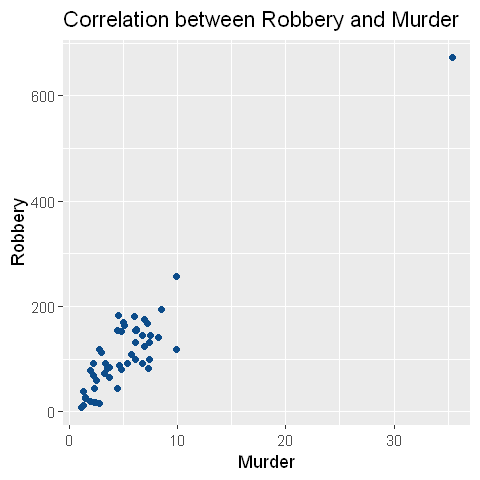

In [23]:
# Format graph size
options(repr.plot.width = 4, repr.plot.height = 4)

# Plot
ggplot2::ggplot(data = crimerate_states) +
  ggplot2::aes(x = murder, y = robbery) +
  ggplot2::geom_point(color = "#0c4c8a") +
  ggplot2::labs(title = "Correlation between Robbery and Murder",
       x = "Murder",
       y = "Robbery") +
  ggplot2::theme_grey()

### Bubble Chart

A bubble chart is a data visualization that displays multiple circles (bubbles) in a two-dimensional plot. It is a generalization of the scatter plot, replacing the dots with bubbles. Most commonly, a bubble chart displays the values of three numeric variables, where each observation's data is shown by a circle ("bubble"), while the horizontal and vertical positions of the bubble show the values of two other variables.

_Source:_ https://www.displayr.com/what-is-a-bubble-chart/

Using the same data a sbubble chart, for demonstration, we can plot correlation between more than two variables by utilizing the size and color property of a bubble chart.

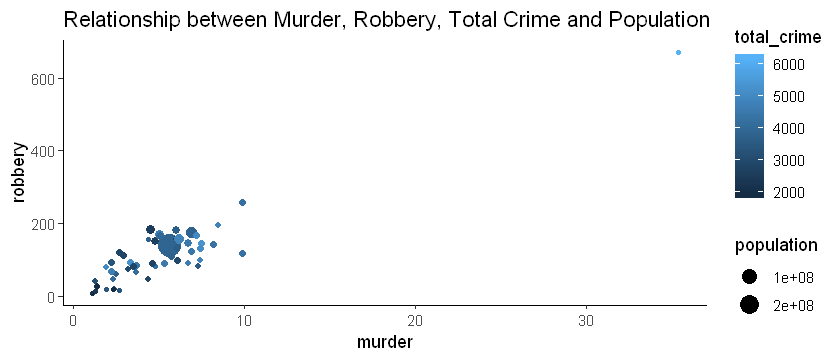

In [24]:
# Format graph size
options(repr.plot.width = 7, repr.plot.height = 3)

# Plot
ggplot2::ggplot(data = crimerate) +
  ggplot2::aes(x = murder, y = robbery, color = total_crime, size = population) +
  ggplot2::geom_point() +
  ggplot2::labs(title = "Relationship between Murder, Robbery, Total Crime and Population") +
  ggplot2::theme_classic()

### Density Plot

A Density Plot visualises the distribution of data over a continuous interval or time period. This chart is a variation of a Histogram that uses kernel smoothing to plot values, allowing for smoother distributions by smoothing out the noise. The peaks of a Density Plot help display where values are concentrated over the interval.

An advantage Density Plots have over Histograms is that they're better at determining the distribution shape because they're not affected by the number of bins used (each bar used in a typical histogram). A Histogram comprising of only 4 bins wouldn't produce a distinguishable enough shape of distribution as a 20-bin Histogram would. However, with Density Plots, this isn't an issue.

_Source:_ https://datavizcatalogue.com/methods/density_plot.html

<img src="Images/density.png">

To demonstrate, let us compare total crime rate of mid west states to the rest of the states in the USA.

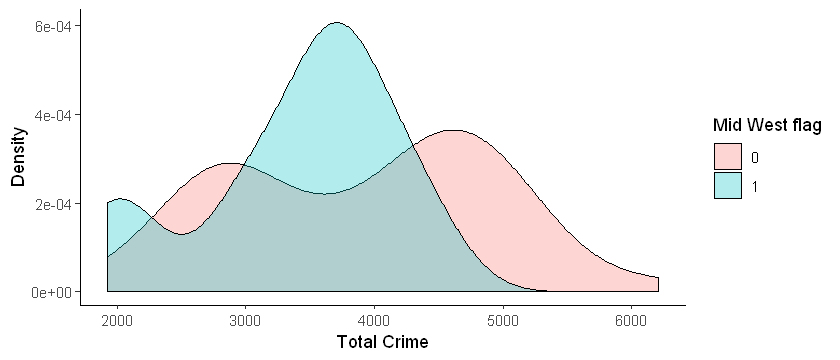

In [25]:
# Prepare data
crimerate_compare <- crimerate_states[,-1]
rownames(crimerate_compare) <- crimerate_states[,1]

# Plot
ggplot2::ggplot(crimerate_compare) +
  ggplot2::aes(total_crime, fill=as.factor(crimerate_compare$midwest)) +
  ggplot2::geom_density(alpha = 0.3) +
  ggplot2::labs(x='Total Crime', y='Density') +
  ggplot2::theme_classic() +
  ggplot2::guides(fill=ggplot2::guide_legend(title="Mid West flag"))

### Contour plot

Contour plots (sometimes called Level Plots) are a way to show a three-dimensional surface on a two-dimensional plane. It graphs two predictor variables X Y on the y-axis and a response variable Z as contours. These contours are sometimes called z-slices or iso-response values. 

_Source:_ https://www.statisticshowto.datasciencecentral.com/contour-plots/

Contour plots could be 

* __Rectangular__
<img src="Images/contour1.png">

* __Polar__
<img src="Images/contour2.png">

* __Triangular__
<img src="Images/contour3.png">

For demonstration, let's take the NBA dataset and plot FTM (freethrow made) in _x axis_, FTA (freethrow attempt) in _y axis_ and TO (turnover) as the spatial points (_z axis_).

In [2]:
# Get data
ppg = read.csv(paste(getwd(),'/Data/ppg2008.csv', sep=''))

# Examine data
head(ppg)

Name,G,MIN,PTS,FGM,FGA,FGP,FTM,FTA,FTP,...,X3PA,X3PP,ORB,DRB,TRB,AST,STL,BLK,TO,PF
Dwyane Wade,79,38.6,30.2,10.8,22.0,0.491,7.5,9.8,0.765,...,3.5,0.317,1.1,3.9,5.0,7.5,2.2,1.3,3.4,2.3
LeBron James,81,37.7,28.4,9.7,19.9,0.489,7.3,9.4,0.780,...,4.7,0.344,1.3,6.3,7.6,7.2,1.7,1.1,3.0,1.7
Kobe Bryant,82,36.2,26.8,9.8,20.9,0.467,5.9,6.9,0.856,...,4.1,0.351,1.1,4.1,5.2,4.9,1.5,0.5,2.6,2.3
Dirk Nowitzki,81,37.7,25.9,9.6,20.0,0.479,6.0,6.7,0.890,...,2.1,0.359,1.1,7.3,8.4,2.4,0.8,0.8,1.9,2.2
Danny Granger,67,36.2,25.8,8.5,19.1,0.447,6.0,6.9,0.878,...,6.7,0.404,0.7,4.4,5.1,2.7,1.0,1.4,2.5,3.1
Kevin Durant,74,39.0,25.3,8.9,18.8,0.476,6.1,7.1,0.863,...,3.1,0.422,1.0,5.5,6.5,2.8,1.3,0.7,3.0,1.8


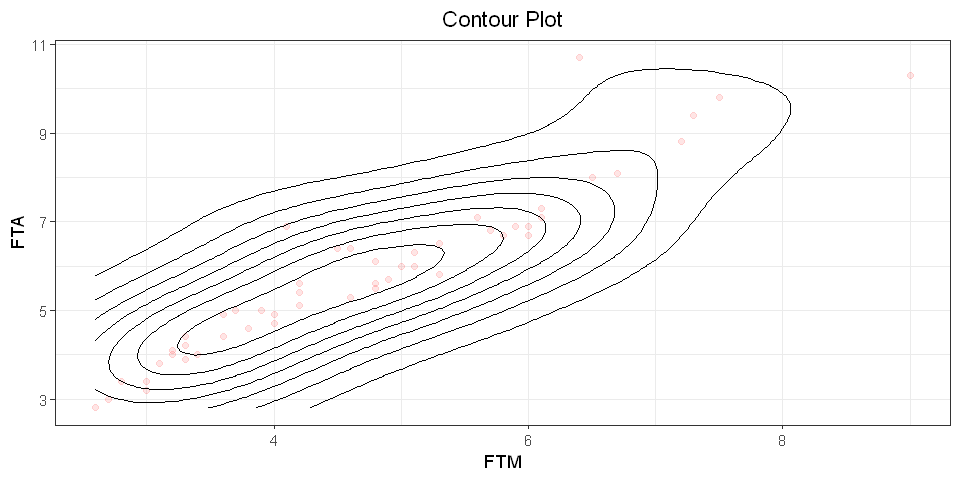

In [12]:
# Create contour plot
ggplot2::ggplot(ppg, ggplot2::aes(x=FTM, y=FTA))+
  ggplot2::theme_bw()+
  ggplot2::geom_point(alpha=0.1, col='red')+
  ggplot2::geom_density2d(color='black')+
  ggplot2::ggtitle('Contour Plot')+
  ggplot2::theme(plot.title = ggplot2::element_text(hjust = 0.5))+
  ggplot2::labs(x='FTM', y='FTA',z='TO')

### Histogram

Histograms provide a visual interpretation of numerical data by indicating the number of data points that lie within a range of values. These ranges of values are called classes or bins. The frequency of the data that falls in each class is depicted by the use of a bar. The higher that the bar is, the greater the frequency of data values in that bin.

Histogram is very similar to bar graph but bar graph plots frequency about categorical data whereas histogram plots frequency of ordinal/numeric data.

<img src="Images/histogram.png">

In [15]:
# load birth rate data
birthrate <- read.csv(paste(getwd(),'/Data/birth-rate.csv', sep=''))

# Create pivotted data for plotting
birthrate_hist <- reshape2::melt(birthrate, id=c("Country")) %>%
  dplyr::mutate("Country" = as.character(Country),
                "Year" = as.character(variable),
                "Population" = value,
                "Population_int" = ceiling(value)) %>% 
  dplyr::select(c("Country","Year","Population", "Population_int"))

head(birthrate_hist)

Country,Year,Population,Population_int
Aruba,X1960,36.40000,37
Afghanistan,X1960,52.20100,53
Angola,X1960,54.43200,55
Albania,X1960,40.88600,41
Netherlands Antilles,X1960,32.32100,33
Arab World,X1960,47.61122,48


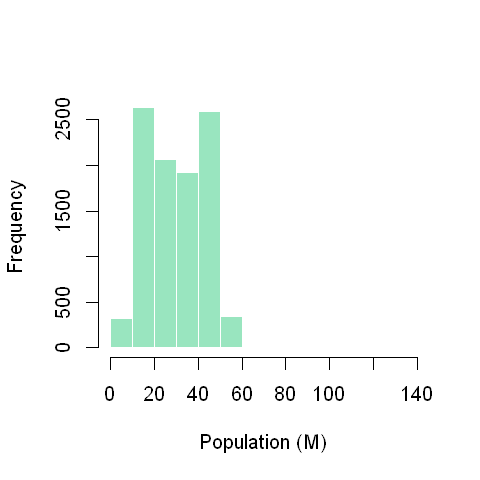

In [34]:
options(repr.plot.width = 4, repr.plot.height = 4)

# create histogram of population data
hist(birthrate_hist$Population_int, xlab = "Population (M)", col=rgb(0.2,0.8,0.5,0.5) , border=F , main="")

### Box plot

A box plot is also called a box and whisker plot. It is a convenient way of graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot. Outliers are usually plotted as individual data points.

<img src="Images/box.png">

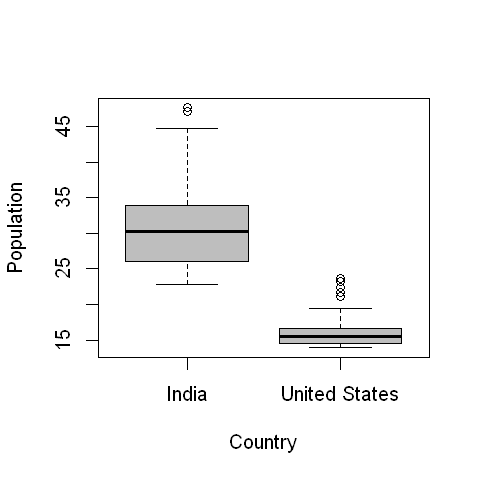

In [36]:
# create box plot of population data
birthrate_box <- birthrate_hist %>% 
  dplyr::filter(Country %in% c("United States", "India"))

boxplot(birthrate_box$Population ~ birthrate_box$Country , xlab = "Country", ylab = "Population", col="grey")

### Parallel plot

Parallel plot or Parallel Coordinates Plots allow to compare the feature of several individual observations on a set of numerical variables. Each vertical bar represents a variable and usually has its own scale. (The units can even be different!). Values are then plotted as series of lines connected across each axis.

_Source:_ https://python-graph-gallery.com/parallel-plot/

<img src="Images/parallel.png">

Let's plot the different measures for education type, reading, writing and math, across all the states of USA.

In [44]:
# load education data
education <- read.csv(paste(getwd(),'/Data/education.csv', sep=''))

# parallel plot
education_parallel <- education %>% 
  dplyr::filter(stringr::str_trim(state, "both") != "United States")

head(education_parallel)

state,reading,math,writing,percent_graduates_sat,pupil_staff_ratio,dropout_rate
Alabama,557,552,549,7,6.7,2.3
Alaska,520,516,492,46,7.9,7.3
Arizona,516,521,497,26,10.4,7.6
Arkansas,572,572,556,5,6.8,4.6
California,500,513,498,49,10.9,5.5
Colorado,568,575,555,20,8.1,6.9


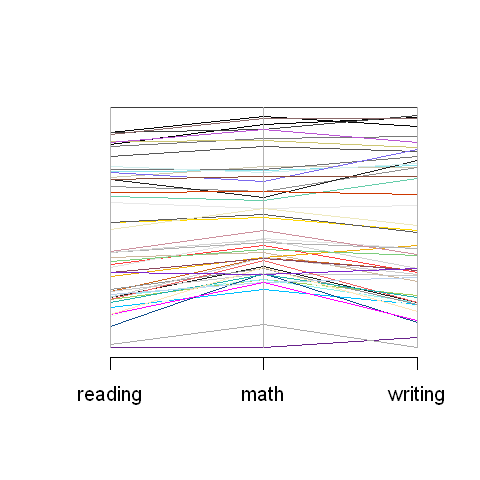

In [43]:
# vector color
my_colors=colors()[as.numeric(education_parallel$state)*11]

# make the graph
MASS::parcoord(education_parallel[,c(2:4)] , col= my_colors  )

<h1><center>End of Code</center></h1>